In [ ]:
import pandas as pd

# Load the merged dataset
file_path = "../datasets/final_merged_dataset.parquet"
merged_data = pd.read_parquet(file_path)

# Ensure 'date' is in datetime format
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'])

# Set date as index (Required for ARIMA)
merged_data.set_index('date', inplace=True)

# Select only the Close Price column
price_data = merged_data[['Close']]

# Display the first few rows
print(price_data.head())

               Close
date                
2021-01-01  0.262398
2021-01-02  0.315568
2021-01-03  0.328213
2021-01-04  0.312568
2021-01-05  0.351590


# Checking for stationarity

In [41]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
adf_result = adfuller(price_data['Close'])

# Print the ADF test results
print("ADF Test Results:")
print(f"Test Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")  # If > 0.05, data is non-stationary
print(f"Critical Values: {adf_result[4]}")

# Conclusion
if adf_result[1] > 0.05:
    print("The data is non-stationary. Differencing is needed.")
else:
    print("The data is already stationary. No differencing required.")

ADF Test Results:
Test Statistic: -1.3572678770417697
P-Value: 0.6025824740517515
Critical Values: {'1%': -3.4389835846902788, '5%': -2.8653504478604757, '10%': -2.5687990737534627}
The data is non-stationary. Differencing is needed.


/var/folders/x5/7fmrypvd2mj6rc45kq6kv2lh0000gn/T/ipykernel_73827/4260320125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['Close_diff'] = price_data['Close'].diff()
/var/folders/x5/7fmrypvd2mj6rc45kq6kv2lh0000gn/T/ipykernel_73827/4260320125.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data.dropna(inplace=True)


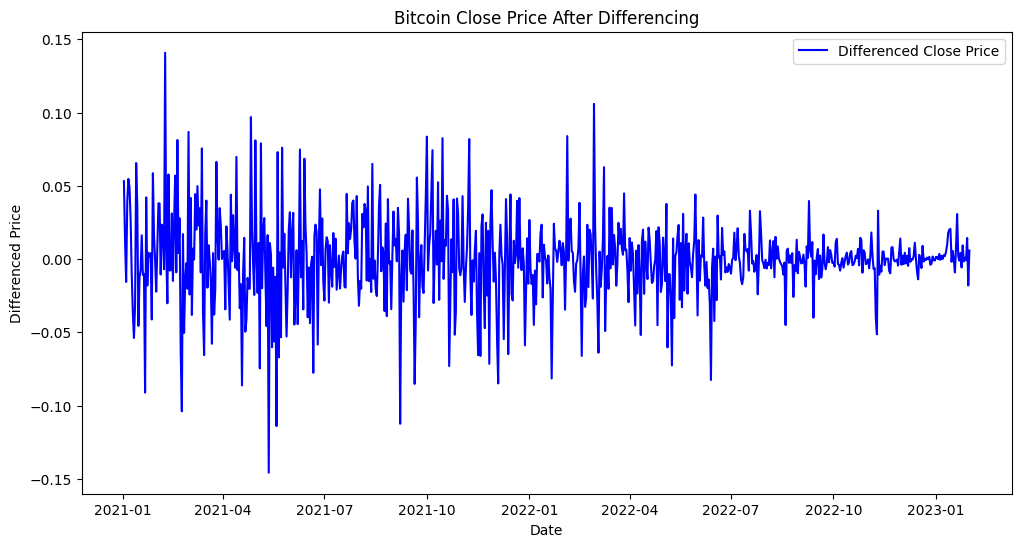

In [42]:
import matplotlib.pyplot as plt

# First-order differencing (if needed)
price_data['Close_diff'] = price_data['Close'].diff()

# Drop NaN values after differencing
price_data.dropna(inplace=True)

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(price_data.index, price_data['Close_diff'], label="Differenced Close Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.title("Bitcoin Close Price After Differencing")
plt.legend()
plt.show()

In [43]:
# Split 80% Train, 20% Test
train_size = int(len(price_data) * 0.8)
train, test = price_data.iloc[:train_size], price_data.iloc[train_size:]

# Print the split sizes
print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")

Training set size: 608
Testing set size: 152


In [44]:
import pmdarima as pm

# Auto ARIMA to determine optimal parameters
auto_arima_model = pm.auto_arima(train['Close'], seasonal=False, trace=True, suppress_warnings=True)

# Print the best parameters
print(f"Optimal ARIMA Order: {auto_arima_model.order}")

Performing stepwise search to minimize aic


/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' wa

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2448.041, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2455.222, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2454.013, Time=0.01 sec


/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2454.003, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2457.135, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2452.020, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.283 seconds
Optimal ARIMA Order: (0, 1, 0)


/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [45]:
from statsmodels.tsa.arima.model import ARIMA

# Extract optimal order from auto_arima
p, d, q = auto_arima_model.order

# Train ARIMA Model
arima_model = ARIMA(train['Close'], order=(p, d, q))
arima_result = arima_model.fit()

# Print Model Summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  608
Model:                 ARIMA(0, 1, 0)   Log Likelihood                1229.568
Date:                Sat, 15 Mar 2025   AIC                          -2457.135
Time:                        20:26:36   BIC                          -2452.727
Sample:                    01-02-2021   HQIC                         -2455.420
                         - 09-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0010   4.04e-05     25.190      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):               120.58
Prob(Q):                              0.37   Pr

/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Forecast Future Prices

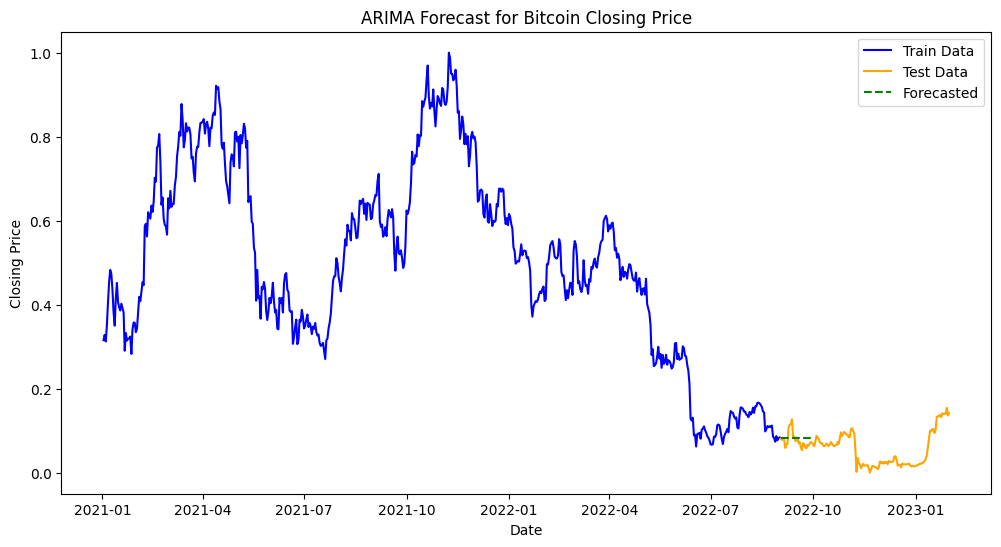

In [46]:
# Forecast next 30 days
forecast_horizon = 30
forecast = arima_result.forecast(steps=forecast_horizon)

# Convert index to match test set
forecast_dates = pd.date_range(start=test.index[0], periods=forecast_horizon, freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast_Close': forecast.values})
forecast_df.set_index('Date', inplace=True)

# Plot Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label="Train Data", color='blue')
plt.plot(test.index, test['Close'], label="Test Data", color='orange')
plt.plot(forecast_df.index, forecast_df['Forecast_Close'], label="Forecasted", color='green', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("ARIMA Forecast for Bitcoin Closing Price")
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Ensure forecast aligns with test set for evaluation
test_subset = test.iloc[:forecast_horizon]

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_subset['Close'], forecast_df['Forecast_Close']))
mape = mean_absolute_percentage_error(test_subset['Close'], forecast_df['Forecast_Close'])

print(f"ARIMA Model Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")

ARIMA Model Evaluation:
RMSE: 0.0188
MAPE: 21.2473%


In [48]:
import joblib
import os

# Define save path
model_save_path = "../artifacts/arima_model.pkl"

# Ensure the directory exists
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the trained ARIMA model
joblib.dump(arima_result, model_save_path)

print(f"✅ ARIMA model saved at {model_save_path}")

✅ ARIMA model saved at ../artifacts/arima_model.pkl


In [49]:
import json

# Define save path for ARIMA params and metrics
params_save_path = "../artifacts/arima_params.json"

# Create a dictionary with ARIMA details
arima_details = {
    "p": p,
    "d": d,
    "q": q,
    "RMSE": rmse,
    "MAPE": mape,
    "train_size": len(train),
    "test_size": len(test)
}

# Save as JSON
with open(params_save_path, "w") as json_file:
    json.dump(arima_details, json_file, indent=4)

print(f"✅ ARIMA parameters & metrics saved at {params_save_path}")

✅ ARIMA parameters & metrics saved at ../artifacts/arima_params.json


In [50]:
import sys
import os

sys.path.append(os.path.abspath("../")) 

In [51]:
# Import the logging function
from src.metric_logging import log_experiment

# Retrieve ARIMA parameters from the trained model
arima_params = {
    "p": arima_result.model_orders.get("ar"),  # AutoRegressive order
    "d": arima_result.model_orders.get("diff"),  # Differencing order
    "q": arima_result.model_orders.get("ma")  # Moving Average order
}

# Prepare ARIMA evaluation metrics
arima_metrics = {
    "RMSE": rmse,
    "MAPE": mape
}

# Log ARIMA results to MLflow (DagsHub)
log_experiment("ARIMA", arima_params, arima_metrics)

✅ ARIMA metrics logged successfully to DagsHub MLflow.
🏃 View run ARIMA-Baseline at: https://dagshub.com/vamsisaigarapati/bitcoin_price_pred_CSE574.mlflow/#/experiments/0/runs/953f72adb7e44d98ab69cb1cd1a2669b
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/bitcoin_price_pred_CSE574.mlflow/#/experiments/0


### We will implement one strong ARIMA model with:
### 1️⃣ Exogenous Features: Adding sentiment scores & volatility indicators.
### 2️⃣ Manual Hyperparameter Tuning: Adjusting (p, d, q) instead of relying only on Auto ARIMA.
### 3️⃣ Rolling Forecasting: Predicting one step at a time to avoid information leakage.
### 4️⃣ Seasonal ARIMA (SARIMA) (if needed): Capturing seasonal patterns if present.


In [60]:
import pandas as pd
import numpy as np
import json
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from src.metric_logging import log_experiment

# Load merged dataset
file_path = "../datasets/final_merged_dataset.parquet"
merged_data = pd.read_parquet(file_path)

# Ensure date column is in datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.set_index('date', inplace=True)

# Select features: Bitcoin Close Price + Sentiment + Volatility
feature_columns = ['Close', 'sentiment_score', 'bert_sentiment', 'volatility_7d', 'volatility_30d', 'Volume']
time_series_data = merged_data[feature_columns]

# Drop NaN values
time_series_data.dropna(inplace=True)

# Convert time-series to stationary if needed
time_series_data['Close_diff'] = time_series_data['Close'].diff()
time_series_data.dropna(inplace=True)

/var/folders/x5/7fmrypvd2mj6rc45kq6kv2lh0000gn/T/ipykernel_73827/332615079.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data.dropna(inplace=True)
/var/folders/x5/7fmrypvd2mj6rc45kq6kv2lh0000gn/T/ipykernel_73827/332615079.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Close_diff'] = time_series_data['Close'].diff()
/var/folders/x5/7fmrypvd2mj6rc45kq6kv2lh0000gn/T/ipykernel_73827/332615079.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [61]:
# 80% Train, 20% Test split
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data.iloc[:train_size], time_series_data.iloc[train_size:]

print(f"Train Size: {len(train)}, Test Size: {len(test)}")

Train Size: 608, Test Size: 152


In [62]:
# Run Auto ARIMA to get initial (p, d, q) estimates
auto_arima_model = auto_arima(train['Close'], exogenous=train[['sentiment_score', 'volatility_7d']], 
                              seasonal=False, trace=True, suppress_warnings=True)

# Extract suggested values
p, d, q = auto_arima_model.order

# Manually fine-tune (p, d, q) if needed
p = max(0, p - 1)  # Adjust AR term
q = max(0, q + 1)  # Adjust MA term

print(f"Optimized ARIMA Order: p={p}, d={d}, q={q}")

/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' wa

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2448.041, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2455.222, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2454.013, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2454.003, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2457.135, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2452.020, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.314 seconds
Optimized ARIMA Order: p=0, d=1, q=1


/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [63]:
# Fit ARIMA model with sentiment & volatility as exogenous variables
arima_model = ARIMA(train['Close'], order=(p, d, q), exog=train[['sentiment_score', 'volatility_7d']])
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  608
Model:                 ARIMA(0, 1, 1)   Log Likelihood                1231.282
Date:                Sat, 15 Mar 2025   AIC                          -2454.564
Time:                        21:43:26   BIC                          -2436.930
Sample:                    01-02-2021   HQIC                         -2447.703
                         - 09-01-2022                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sentiment_score    -0.0159      0.021     -0.771      0.441      -0.056       0.024
volatility_7d      -0.2076      0.086     -2.409      0.016      -0.377      -0.039
ma.L1              -0.0357      

/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bit_pred_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [64]:
# Define rolling window forecast
rolling_forecast = []
history = list(train['Close'])  # Initialize with training data
history_exog = train[['sentiment_score', 'volatility_7d']].iloc[:len(history)].values.tolist()  # Initialize exog history

for t in range(len(test)):
    # Ensure exog matches the length of history
    history_df = pd.DataFrame(history, columns=['Close'])
    exog_df = pd.DataFrame(history_exog, columns=['sentiment_score', 'volatility_7d'])

    # Train ARIMA model with updated exog features
    model = ARIMA(history_df, order=(p, d, q), exog=exog_df)
    model_fit = model.fit()

    # Forecast next step
    next_exog = test[['sentiment_score', 'volatility_7d']].iloc[t:t+1].values  # Get next exog row
    yhat = model_fit.forecast(exog=next_exog)

    # Store prediction
    rolling_forecast.append(yhat.values[0])

    # Update history
    history.append(test['Close'].iloc[t])
    history_exog.append(next_exog[0])  # Append exog features

# Convert results to DataFrame
rolling_forecast_df = pd.DataFrame({'Date': test.index[:len(rolling_forecast)], 'Predicted_Close': rolling_forecast})
rolling_forecast_df.set_index('Date', inplace=True)

print("✅ Fixed rolling predictions completed successfully!")

✅ Fixed rolling predictions completed successfully!


In [65]:
# Align test data for evaluation
test_subset = test.iloc[:len(rolling_forecast_df)].copy()

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_subset['Close'], rolling_forecast_df['Predicted_Close']))

# Log RMSE to MLflow
log_experiment("Improved_ARIMA", {}, {"RMSE": rmse})

# Print results
print("✅ Final Fixed ARIMA Model Evaluation:")
print(f"RMSE: {rmse:.4f}")

✅ Improved_ARIMA metrics logged successfully to DagsHub MLflow.
🏃 View run Improved_ARIMA-Baseline at: https://dagshub.com/vamsisaigarapati/bitcoin_price_pred_CSE574.mlflow/#/experiments/0/runs/76a6072d817c4ef99a79669254d9c879
🧪 View experiment at: https://dagshub.com/vamsisaigarapati/bitcoin_price_pred_CSE574.mlflow/#/experiments/0
✅ Final Fixed ARIMA Model Evaluation:
RMSE: 0.0105
